# Stock Analysis with R

We will be analyzing **Palo Alto Networks, Inc (PANW)** stock data. Palo Alto Networks is a leading cybersecurity company that provides advanced security solutions to protect organizations from cyber threats. 

Palo Alto Networks (NYSE: PANW) began trading on the New York Stock Exchange on July 20, 2012 - it ended of being one of the 10 largest IPOs of that year. Since then, it has become a prominent player in the cybersecurity industry, providing innovative security solutions to organizations worldwide.

In [20]:
# Loading the libraries
library(tidyverse)
library(quantmod)
library(tidyquant)
library(tseries)
library(ggplot2)

In [3]:
# Getting historical price data for the PANW Stock from Yahoo Finance

getSymbols("PANW", from='2012-07-20', to='2024-02-23', warnings=FALSE, auto.assign=TRUE)

mydata <- tq_get('PANW', from='2012-07-20', to='2024-02-23', get='stock.prices')

panw = mydata
mydata

[1] "PANW"

symbol,date,open,high,low,close,volume,adjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PANW,2012-07-20,18.38333,20.69000,17.70000,17.71000,21048300,17.71000
PANW,2012-07-23,17.53333,18.00000,17.03333,17.17000,2365200,17.17000
PANW,2012-07-24,17.33333,18.66667,17.17333,18.50000,2150400,18.50000
PANW,2012-07-25,18.83333,19.66667,18.43333,19.65000,1799100,19.65000
PANW,2012-07-26,19.92667,20.61667,19.36000,19.96000,1283400,19.96000
PANW,2012-07-27,20.29333,20.29333,19.00000,19.00000,460200,19.00000
PANW,2012-07-30,18.95333,18.95333,17.97333,18.33333,829200,18.33333
PANW,2012-07-31,18.33333,19.04667,17.40333,19.04667,856200,19.04667
PANW,2012-08-01,19.57333,19.57333,18.38000,18.72667,332700,18.72667


In [4]:
# We add another column to the dataframe containing log prices
mydata$log_close = log(mydata$close)

# Check the first few rows of the updated dataframe
head(mydata)

symbol,date,open,high,low,close,volume,adjusted,log_close
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PANW,2012-07-20,18.38333,20.69000,17.70000,17.71,21048300,17.71,2.874129
PANW,2012-07-23,17.53333,18.00000,17.03333,17.17,2365200,17.17,2.843164
PANW,2012-07-24,17.33333,18.66667,17.17333,18.50,2150400,18.50,2.917771
PANW,2012-07-25,18.83333,19.66667,18.43333,19.65,1799100,19.65,2.978077
PANW,2012-07-26,19.92667,20.61667,19.36000,19.96,1283400,19.96,2.993730
PANW,2012-07-27,20.29333,20.29333,19.00000,19.00,460200,19.00,2.944439


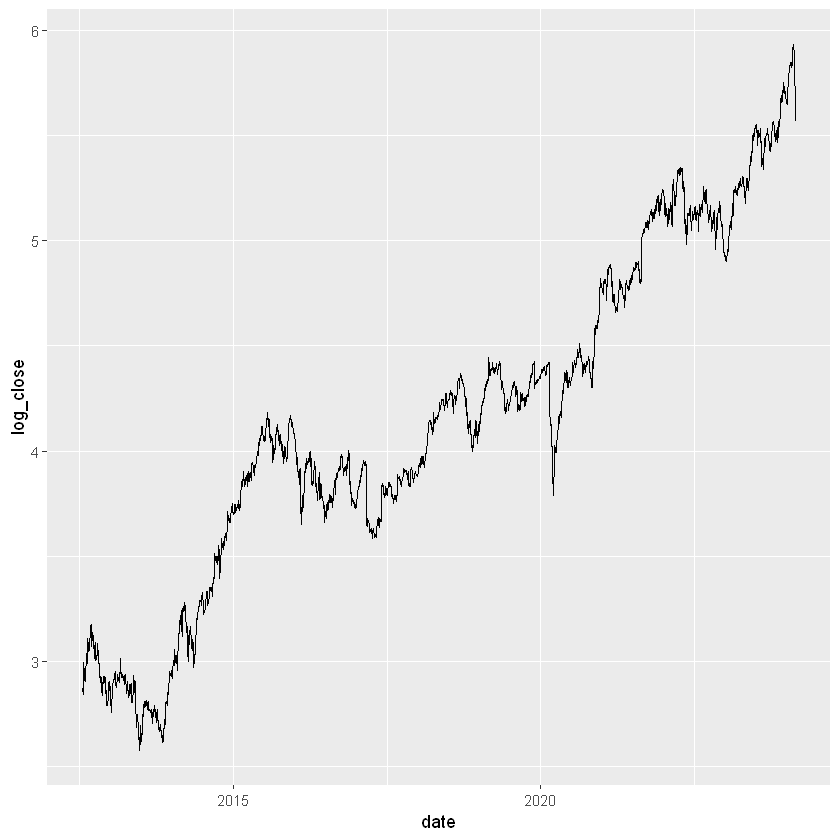

In [5]:
# We will generate a line plot between the logarithm of the closing prices over time
ggplot(mydata, aes(x = date, y = log_close)) + geom_line()

We calculate the log returns with this formula:
$$\text{returns}_t = \log(\text{close}_t) - \log(\text{close}_{t-1})$$
We use *the logarithm of the closing prices* in order to stabilize the variance of the data and make it more interpretable.


We will calculate the difference between consecutive elements of the log_close column and store it in the 'rets' variable.


In [19]:
rets <- diff(mydata$log_close, lags = 1)
mean(rets)

[1] 0.0009317961

In [7]:
var(rets)

[1] 0.0006430469

In [8]:
sd(rets)

[1] 0.02535837

In [9]:
quantile(rets)

0%          25%          50%          75%         100% 
-0.334649197 -0.010433650  0.001216645  0.013368078  0.170590716

In [10]:
median(rets)

[1] 0.001216645

In [11]:
head(rets)

[1] -0.03096572  0.07460705  0.06030659  0.01565291 -0.04929125 -0.03571815

In [12]:
# Create a new column 'returns' in mydata
mydata$returns <- c(0, rets)

mydata

symbol,date,open,high,low,close,volume,adjusted,log_close,returns
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PANW,2012-07-20,18.38333,20.69000,17.70000,17.71000,21048300,17.71000,2.874129,0.0000000000
PANW,2012-07-23,17.53333,18.00000,17.03333,17.17000,2365200,17.17000,2.843164,-0.0309657207
PANW,2012-07-24,17.33333,18.66667,17.17333,18.50000,2150400,18.50000,2.917771,0.0746070527
PANW,2012-07-25,18.83333,19.66667,18.43333,19.65000,1799100,19.65000,2.978077,0.0603065868
PANW,2012-07-26,19.92667,20.61667,19.36000,19.96000,1283400,19.96000,2.993730,0.0156529061
PANW,2012-07-27,20.29333,20.29333,19.00000,19.00000,460200,19.00000,2.944439,-0.0492912458
PANW,2012-07-30,18.95333,18.95333,17.97333,18.33333,829200,18.33333,2.908721,-0.0357181520
PANW,2012-07-31,18.33333,19.04667,17.40333,19.04667,856200,19.04667,2.946892,0.0381713036
PANW,2012-08-01,19.57333,19.57333,18.38000,18.72667,332700,18.72667,2.929949,-0.0169435584


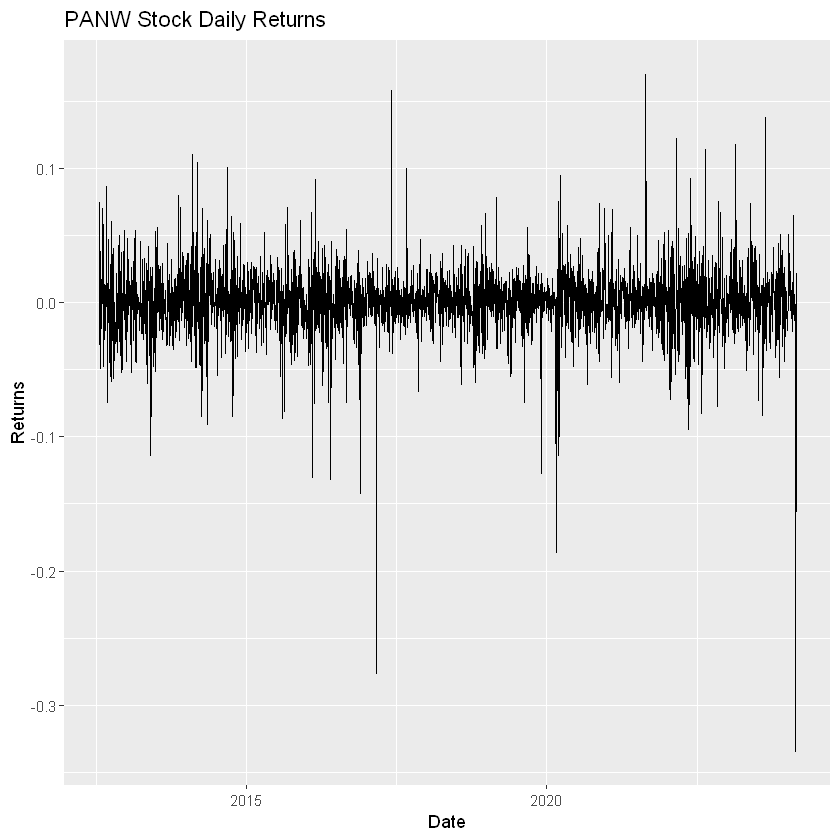

In [13]:
# Combine dates and returns into a data frame
returns_df <- data.frame(date = mydata$date, returns = mydata$returns)

# Create the plot
ggplot(returns_df, aes(x = date, y = returns)) +
  geom_line() +
  labs(title = "PANW Stock Daily Returns",
       x = "Date",
       y = "Returns")

In [14]:
summary(returns_df)

      date               returns          
 Min.   :2012-07-20   Min.   :-0.3346492  
 1st Qu.:2015-06-15   1st Qu.:-0.0104209  
 Median :2018-05-07   Median : 0.0012086  
 Mean   :2018-05-07   Mean   : 0.0009315  
 3rd Qu.:2021-03-30   3rd Qu.: 0.0133619  
 Max.   :2024-02-22   Max.   : 0.1705907  

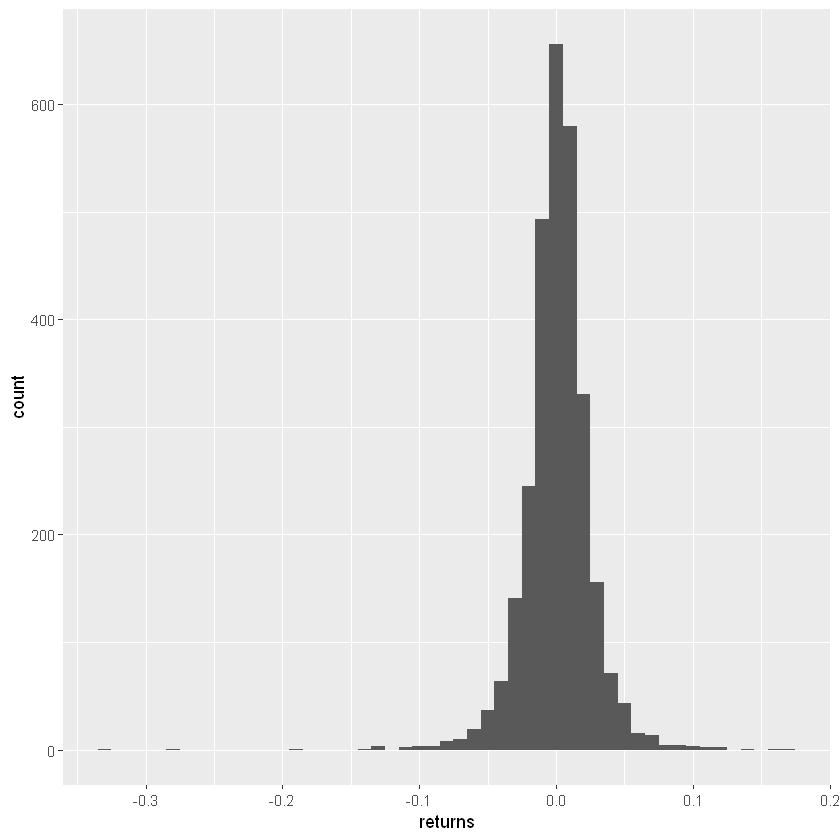

In [15]:
ggplot(mydata, aes(x=returns_df$returns)) + geom_histogram(binwidth = 0.01) + xlab("returns")

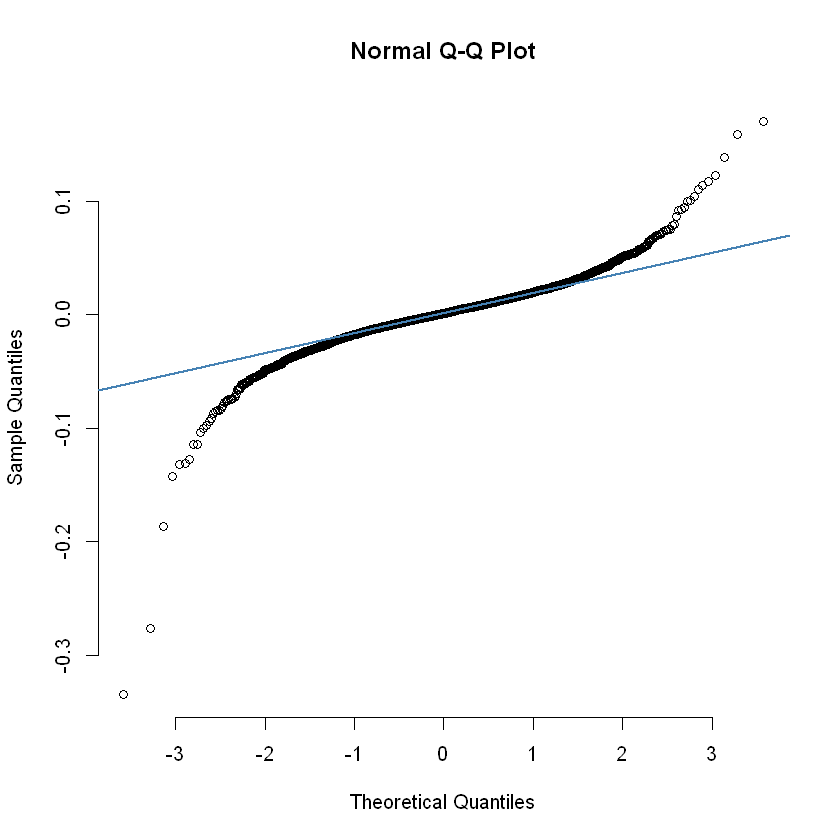

In [16]:
qqnorm(returns_df$returns, pch = 1, frame = FALSE)
qqline(returns_df$returns, col = "steelblue", lwd = 2)

In [17]:
library(tseries)
jarque.bera.test(returns_df$returns)


	Jarque Bera Test

data:  returns_df$returns
X-squared = 49741, df = 2, p-value < 2.2e-16


With a strong focus on innovation and a comprehensive product portfolio, Palo Alto Networks is well-positioned to capitalize on the increasing demand for cybersecurity solutions in today's digital landscape.